UpX Academy - Airlines Project - Bangalore Group - March 2017 Batch - Rajiv Ramanjani
Section3- Airline Traffic
=============
Questions Addressed:
1. Which airline has the highest number of flights? How does it compare to other airlines across each of the four quarters?
2. Which flight number has the highest movement in each of the airports and which flights have minimum movement?
3. Which tail number is used most by an airline? How does it compare with other airlines?

-----------------------------------Section 3 : Airline Traffic------------------------------------------------------------------

In [3]:
#defining the local path of the location of the csv data file
your_local_path="C:/DataScience/AirlinesProject/attachment_Project_1_NYC_Flight_data/"

In [4]:
#importing the panda, numpy and matplotlib libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mla
% matplotlib inline

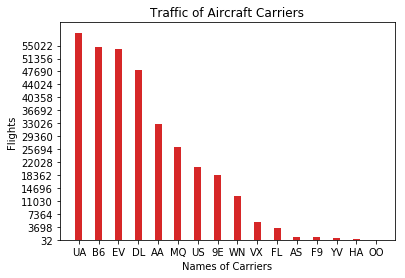

UA Is the carrier with the highest traffic at: 58665 flights in a year.


In [110]:
#Aircraft carrier traffic is depicted in the code of this cell
compustatdata = pd.read_csv(your_local_path+'flight_data.csv', usecols = ['carrier','flight','tailnum'], encoding='latin-1')
#In the above line we have selected only three columns from the csv file
carr_data = compustatdata.groupby('carrier').size().sort_values(ascending=False)  #grouping the data based on airlines name
subcount = compustatdata["carrier"].value_counts() #here the number of flights for each carrier is counted
mx = max(subcount.values) #The maximum number of flights for a carrier is captured here
mi = min(subcount.values) # the minimum number of flights for a carrier is captured here
idx = subcount.index #The unique names of airline carriers are captured from the index part of the subcount 
sz = idx.size #The number of unique names of airline carriers are captured using the size function
interv = int(mx / sz) #The interval size is captured for later use in graph.  This is max / size

#The actual graph definition happens here
yvals = subcount.values  #the values of the y axis are defined here
xvals = np.arange(sz)    # the values of the x are defined here
width = 0.35       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(xvals, yvals, width, color='#d62728')   # the actual bar graph is defined here

plt.ylabel('Flights')    # the y axis label is defined here
plt.xlabel('Names of Carriers') # the x axis label is defined here
plt.title('Traffic of Aircraft Carriers') #the chart title is defined here
plt.xticks(xvals, idx) #the values that go into the x axis and the number of these values are defined here
plt.yticks(np.arange(mi, mx, interv)) #The minimum, maximum values and the difference between the two are defined here
plt.show()   #actual display of the graph

print(subcount.index[0],'Is the carrier with the highest traffic at:',mx, 'flights in a year.')  #addon comments to summarize

# flight_dat = pd.read_csv(your_local_path+'flight_data.csv', usecols = ['month','carrier','flight'])
df = pd.DataFrame(flight_dat.values, columns = ['month','carrier','flightnum'])
Q1 = df.query('month in (1,2,3)')
Q2 = df.query('month in (4,5,6)')
Q3 = df.query('month in (7,8,9)')
Q4 = df.query('month in (10,11,12)')
Q1_count = Q1["carrier"].value_counts()
Q2_count = Q2["carrier"].value_counts()
Q3_count = Q3["carrier"].value_counts()
Q4_count = Q4["carrier"].value_counts()
x = [Q1_count.index]
y = [Q1_count.values]
z = [Q2_count.values]
k = [Q3_count.values]
l = [Q4_count.values]
print("The comparison of airline traffic across the four quarters of 2013 is given below")
N = sz
ind = np.arange(sz)    # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, Q1_count.values, width, color='r')
rects2 = ax.bar(ind+width, Q2_count.values, width, color='g')
rects3 = ax.bar(ind+width*2, Q3_count.values, width, color='b')
rects4 = ax.bar(ind+width*3, Q4_count.values, width, color='y')

ax.set_ylabel('Quarterly Figures')
plt.xlabel('Names of Carriers')
plt.title('Quarterly Traffic of Aircraft Carriers')
ax.set_xticks(ind+width)
ax.set_xticklabels(idx)
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Q1', 'Q2', 'Q3','Q4') )
  
plt.show()

Q1_count = Q1_count.to_frame('Q1 Traffic')
Q2_count = Q2_count.to_frame('Q2 Traffic')
Q3_count = Q3_count.to_frame('Q3 Traffic')
Q4_count = Q4_count.to_frame('Q4 Traffic')
tabl = pd.concat([Q1_count, Q2_count, Q3_count, Q4_count], axis=1)
tabl

In [94]:
flight_dat2 = pd.read_csv(your_local_path+'flight_data.csv', usecols = ['origin','carrier','flight','tailnum']) #copy file data
df2 = pd.DataFrame(flight_dat2.values,columns=['origin','carrier','flight','tailnum']) #define dataframe
table = pd.pivot_table(flight_dat2, values='tailnum', index=['origin'],columns=['carrier','flight'], aggfunc=len) #
jfk = table.query('origin in "JFK"').T   #filtering data of JFK airport 
jfk = jfk.fillna(0)                      #initializing nan cells to zero
jfk2 = jfk.loc[jfk.idxmax()]             #shortlisting the airline/flight number that has maximum flights
ewr = table.query('origin in "EWR"').T   #filtering data of EWR airport 
ewr = ewr.fillna(0)                       #initializing nan cells to zero
ewr2 = ewr.loc[ewr.idxmax()]             #shortlisting the airline/flight number that has maximum flights
lga = table.query('origin in "LGA"').T   #filtering data of LGA airport 
lga = lga.fillna(0)                      #initializing nan cells to zero
lga2 = lga.loc[lga.idxmax()]             #shortlisting the airline/flight number that has maximum flights
arpt = pd.concat([jfk2, ewr2, lga2], axis=1).fillna(0)  #merge/concatenate the data from individual airports
print("The following flights from the below mentioned three airports have the highest movement") #summary comment
arpt  #display of the top flights that originate from each of the three airports

The following flights from the below mentioned three airports have the highest movement


origin            JFK    EWR    LGA
carrier flight                     
AA      59      365.0    0.0    0.0
        119       0.0  365.0    0.0
        1611      0.0    0.0  365.0

In [106]:
taildata = pd.read_csv(your_local_path+'flight_data.csv', usecols = ['tailnum','carrier'], encoding='latin-1')
#copy the tailnum and airline names data
tal_data = taildata.groupby(['tailnum','carrier']).size() #group based on tailnumber data first and then followed by carrier and
                                                        #add the count of the number of tailnumbers based on size parameter
tal_data = tal_data.sort_values(ascending=False) #sort on descending order of size or number of occurences
print("The top 30 tail numbers that are used most by different airlines are given below") #summary comment
tal_data.head(30)  #the top 30 usages of the tailnumbers along with carriers that correspond to it.


The top 30 tail numbers that are used most by different airlines are given below


tailnum  carrier
N725MQ   MQ         575
N722MQ   MQ         513
N723MQ   MQ         507
N711MQ   MQ         486
N713MQ   MQ         483
N258JB   B6         427
N298JB   B6         407
N353JB   B6         404
N351JB   B6         402
N735MQ   MQ         396
N328AA   AA         393
N338AA   AA         388
N228JB   B6         388
N327AA   AA         387
N335AA   AA         385
N0EGMQ   MQ         371
N324JB   B6         370
N274JB   B6         370
N534MQ   MQ         364
N229JB   B6         364
N542MQ   MQ         363
N190JB   B6         362
N183JB   B6         361
N296JB   B6         357
N323AA   AA         357
N249JB   B6         355
N319AA   AA         354
N336AA   AA         353
N247JB   B6         350
N531MQ   MQ         349
dtype: int64

In [ ]:
#tempvar = compustatdata.iloc[:,0]
#y = pd.unique(tempvar)  #The list of unique airline names is captured in the variable y
